# <font color = #119fbf> **Equipe 02 - Trabalho 02**</font>

* Graduação em Engenharia de Computação
* Introdução à Ciências de Dados
* UFC Campus Sobral – 2024.1


## Equipe 02:

1. Gabriel Vasconcelos Santos - 497688
2. Izaias Machado Pessoa Neto - 497372
3. Márcio Bruno Loiola Gomes - 473740
4. Vinicius Costa dos Santos - 473003
5. Vitor Hugo Muniz de Sousa Santos - 475767
6. Wendel Manfrini de Andrade Mendes - 494899
7. William Bruno Sales de Paula Lima - 497345


## Análise de Acidentes Rodoviários no Brasil - 2024

---

### Introdução
Este notebook explora os dados de acidentes rodoviários no Brasil em 2024, fornecidos pela Polícia Rodoviária Federal (PRF). O dataset contém informações sobre dia, horário, local, causa e tipo de acidentes, além de detalhes como o número de veículos envolvidos e o número de feridos.

### Fonte dos Dados
Fonte: Polícia Rodoviária Federal (PRF) - <https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf>

Arquivo: Documento CSV de Acidentes 2024 (Agrupados por ocorrência)
### Objetivos
O objetivo é identificar padrões nos acidentes, analisar causas e severidade, e oferecer insights que possam contribuir para a segurança viária e prevenção de acidentes.

### Importação de bibliotecas
Para iniciar a análise são importadas as bibliotecas que serão utilizadas nas etapas de obtenção, limpeza e exploração dos dados, entre elas bibliotecas de análise númerica e plotagem de gráficos como matplotlib, seaborn e numpy

In [ ]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. (O) Obter dados

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1QPrqFsHCwWRA0MJZML8K7Fd773NhxfJV'
output = 'datatran2024.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1QPrqFsHCwWRA0MJZML8K7Fd773NhxfJV
To: /content/datatran2024.csv
100%|██████████| 13.9M/13.9M [00:00<00:00, 110MB/s] 


'datatran2024.csv'

O código abaixo carrega o dataset de acidentes rodoviários de 2024 (arquivo datatran2024.csv). Após o carregamento, feito como um DataFrame da biblioteca pandas, a função **.head(10)** é utilizado para exibir as 10 primeiras linhas do DataFrame, permitindo uma visualização inicial dos dados.

**O dataset contém informações detalhadas como:**

*   Data e horário dos acidentes
*   Localização (estado, município, rodovia)
*   Causa e tipo do acidente
*   Número de veículos envolvidos
*   Feridos e outros detalhes relevantes para a análise dos acidentes.


In [ ]:
df = pd.read_csv('datatran2024.csv', sep=';', encoding='latin-1')
df.head(10)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,571789.0,2024-01-01,segunda-feira,03:56:00,ES,101,38,CONCEICAO DA BARRA,Ultrapassagem Indevida,Colisão lateral sentido oposto,...,1,1,1,1,3,"-18,48261","-39,92379",SPRF-ES,DEL04-ES,UOP02-DEL04-ES
1,571804.0,2024-01-01,segunda-feira,04:50:00,PI,343,185,PIRIPIRI,Manobra de mudança de faixa,Colisão frontal,...,0,1,0,0,2,"-4,29603281","-41,76732659",SPRF-PI,DEL02-PI,UOP01-DEL02-PI
2,571806.0,2024-01-01,segunda-feira,04:30:00,BA,116,578,BREJOES,Ingestão de álcool pelo condutor,Colisão frontal,...,0,1,2,0,4,"-13,07158302","-39,9611107",SPRF-BA,DEL03-BA,UOP02-DEL03-BA
3,571818.0,2024-01-01,segunda-feira,06:30:00,SE,101,18,MALHADA DOS BOIS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,1,0,2,1,3,"-10,35601949","-36,90552235",SPRF-SE,DEL02-SE,UOP02-DEL02-SE
4,571838.0,2024-01-01,segunda-feira,05:00:00,MT,364,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,2,1,0,3,"-16,17914141","-54,78905337",SPRF-MT,DEL02-MT,UOP01-DEL02-MT
5,571855.0,2024-01-01,segunda-feira,11:50:00,MG,251,447,GRAO MOGOL,Velocidade Incompatível,Colisão traseira,...,0,1,1,1,3,"-16,43408996","-43,27992195",SPRF-MG,DEL12-MG,UOP01-DEL12-MG
6,571910.0,2024-01-01,segunda-feira,15:45:00,BA,116,"852,9",VITORIA DA CONQUISTA,Chuva,Colisão frontal,...,0,2,0,0,2,"-15,0196651","-40,94931289",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
7,571922.0,2024-01-01,segunda-feira,15:30:00,MG,251,"459,7",GRAO MOGOL,Condutor Dormindo,Colisão frontal,...,0,1,3,2,5,"-16,41473399","-43,368613",SPRF-MG,DEL12-MG,UOP01-DEL12-MG
8,571949.0,2024-01-01,segunda-feira,18:10:00,SP,116,550,BARRA DO TURVO,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,1,1,2,"-24,95749618","-48,46440871",SPRF-SP,DEL05-SP,UOP02-DEL05-SP
9,571957.0,2024-01-01,segunda-feira,13:30:00,MG,262,"594,4",CAMPOS ALTOS,Pista Escorregadia,Tombamento,...,0,1,0,0,1,"-19,66568189","-46,16901785",SPRF-MG,DEL08-MG,UOP02-DEL08-MG


##Criando uma cópia do dataset

Como medida de segurança, uma cópia do dataset é criada para evitar futuros erros e permitir a etapa de limpeza e exploração dos dados, uma vez que esta envolve manipulação. Após isto, são expostas as colunas do DataFrame e os tipos de dados associados a elas, num estudo inicial que permitirá a melhor execução das etapas seguintes citadas anteriormente

In [ ]:
# Cria uma cópia do DataFrame original para evitar o SettingWithCopyWarning.
d_copy = df.copy()

d_copy.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

In [ ]:
d_copy.describe()
d_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47703 entries, 0 to 47702
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      47703 non-null  float64
 1   data_inversa            47703 non-null  object 
 2   dia_semana              47703 non-null  object 
 3   horario                 47703 non-null  object 
 4   uf                      47703 non-null  object 
 5   br                      47703 non-null  int64  
 6   km                      47703 non-null  object 
 7   municipio               47703 non-null  object 
 8   causa_acidente          47703 non-null  object 
 9   tipo_acidente           47703 non-null  object 
 10  classificacao_acidente  47702 non-null  object 
 11  fase_dia                47703 non-null  object 
 12  sentido_via             47703 non-null  object 
 13  condicao_metereologica  47703 non-null  object 
 14  tipo_pista              47703 non-null

### Explicação breve de cada coluna do dataset da Polícia Rodoviária Federal sobre acidentes no Brasil:

1. **id**: Identificador único do acidente.
2. **data_inversa**: Data em que o acidente ocorreu (formato yyyy-mm-dd).
3. **dia_semana**: Dia da semana em que o acidente ocorreu.
4. **horario**: Hora exata do acidente.
5. **uf**: Unidade Federativa (estado) onde ocorreu o acidente.
6. **br**: Número da rodovia BR onde o acidente ocorreu.
7. **km**: Quilômetro exato da rodovia em que o acidente aconteceu.
8. **municipio**: Município em que ocorreu o acidente.
9. **causa_acidente**: Causa principal do acidente.
10. **tipo_acidente**: Tipo de acidente ocorrido (ex: colisão, capotamento).
11. **classificacao_acidente**: Classificação do acidente quanto à gravidade (ex: leve, grave).
12. **fase_dia**: Fase do dia em que o acidente ocorreu (ex: manhã, tarde, noite).
13. **sentido_via**: Sentido da via no momento do acidente (ex: crescente ou decrescente).
14. **condicao_metereologica**: Condição climática no momento do acidente (ex: chuva, sol).
15. **tipo_pista**: Tipo da pista onde ocorreu o acidente (ex: simples, dupla).
16. **tracado_via**: Tipo de traçado da via (ex: reta, curva).
17. **uso_solo**: Uso do solo onde ocorreu o acidente (ex: urbano, rural).
18. **pessoas**: Número total de pessoas envolvidas no acidente.
19. **mortos**: Número de mortes registradas no acidente.
20. **feridos_leves**: Número de feridos leves.
21. **feridos_graves**: Número de feridos graves.
22. **ilesos**: Número de pessoas ilesas no acidente.
23. **ignorados**: Número de pessoas cuja condição não foi registrada.
24. **feridos**: Número total de feridos (soma dos feridos leves e graves).
25. **veiculos**: Número de veículos envolvidos no acidente.
26. **latitude**: Coordenada de latitude do local do acidente.
27. **longitude**: Coordenada de longitude do local do acidente.
28. **regional**: Regional da Polícia Rodoviária Federal responsável pela área.
29. **delegacia**: Delegacia da PRF responsável pela ocorrência.
30. **uop**: Unidade Operacional da PRF responsável pelo atendimento.

Este dataset oferece uma visão abrangente sobre acidentes de trânsito nas rodovias federais brasileiras.

## 2. (S) Limpeza de dados

---

O processo de limpeza do DataFrame segue práticas comuns para garantir a qualidade dos dados. Primeiro, é realizada a detecção e remoção de valores nulos e duplicados, essenciais para evitar distorções nos resultados. Em seguida, são tratados os **outliers** (valores atípicos que desviam significativamente da maioria dos dados), já que sua presença pode comprometer a análise estatística e a visualização gráfica. Também é feita uma conversão de tipos de dados, corrigindo colunas que deveriam ser numéricas ou de data, mas foram carregadas como strings (texto). Esse tratamento é crucial para que as operações matemáticas e temporais possam ser realizadas corretamente.


In [ ]:
# Detecção dos valores nulos
valores_nulos = np.sum(d_copy.isnull())

valores_nulos

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
id,0
data_inversa,0
dia_semana,0
horario,0
uf,0
br,0
km,0
municipio,0
causa_acidente,0
tipo_acidente,0


In [ ]:
# Detecção dos valores duplicados

valores_d = np.sum(d_copy.duplicated())

valores_d

0

In [ ]:
## Visualizando a porcentagem de valores nulos por coluna

percent_nulos = d_copy.isnull().mean() * 100

percent_nulos

,0
id,0.000000
data_inversa,0.000000
dia_semana,0.000000
horario,0.000000
uf,0.000000
br,0.000000
km,0.000000
municipio,0.000000
causa_acidente,0.000000
tipo_acidente,0.000000


## Análise de outliers antes de tratamento

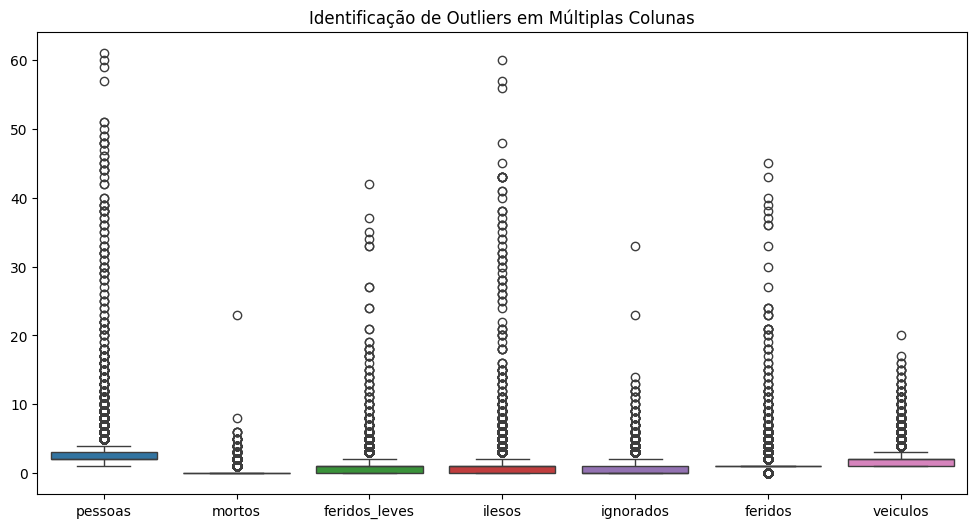

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=d_copy[['pessoas', 'mortos', 'feridos_leves', 'ilesos', 'ignorados', 'feridos', 'veiculos']])
plt.title("Identificação de Outliers em Múltiplas Colunas")
plt.show()

#Modificar outliers com base no desvio padrão(Z-score)

In [ ]:
# Função para identificar e modificar outliers com base no desvio padrão
def modificar_outliers_zscore_multiplas_colunas(df, colunas, limite=3):
    for coluna in colunas:
        media = np.mean(df[coluna])
        desvio_padrao = np.std(df[coluna])
        # Condição para identificar outliers
        condicao_outliers = np.abs(df[coluna] - media) > limite * desvio_padrao
        # Substituindo outliers pela média, truncando para inteiro se a coluna for inteira
        if np.issubdtype(df[coluna].dtype, np.integer):
            media = np.floor(media).astype(int)  # Trunca a média para inteiro
        df.loc[condicao_outliers, coluna] = media
    return df

# Colunas de interesse
colunas_interesse = [
    'pessoas', 'mortos', 'feridos_leves', 'feridos_graves',
    'ilesos', 'ignorados', 'feridos', 'veiculos'
]

# Modificando o dataset d_copy, substituindo outliers pela média (truncada para inteiros se necessário)
d_copy = modificar_outliers_zscore_multiplas_colunas(d_copy, colunas_interesse)


##Análise de outliers após o tratamento

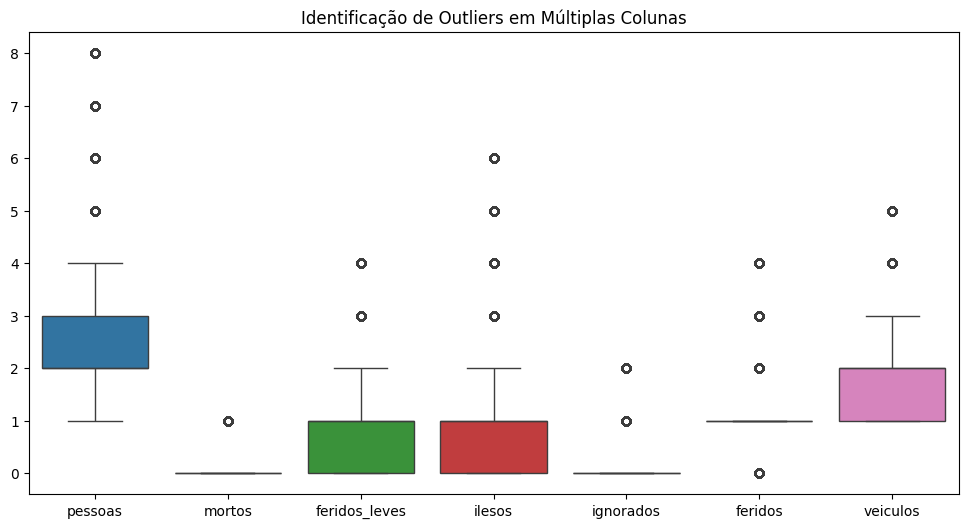

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=d_copy[['pessoas', 'mortos', 'feridos_leves', 'ilesos', 'ignorados', 'feridos', 'veiculos']])
plt.title("Identificação de Outliers em Múltiplas Colunas")
plt.show()

##Tratando dados duplicados

In [ ]:
# Remove as linhas duplicadas do DataFrame, modificando-o diretamente (inplace).
d_copy.drop_duplicates(keep='first', inplace=True)

# Verificar dados faltantes e excluir dados nulos.
if d_copy.isnull().values.any():
  d_copy = d_copy.dropna()
  print("Linhas com valores nulos foram removidas do DataFrame.")
else:
  print("Não há valores nulos no DataFrame.")


Linhas com valores nulos foram removidas do DataFrame.


## Substituir valores faltantes pela média

In [ ]:

for col in df.select_dtypes(include=['number']): # Calculate mean for numeric columns only
    df[col].fillna(df[col].mean(), inplace=True)


##Converter datas para formato datetime e setando colunas numéricas em string para float

In [ ]:

df['data_inversa'] = pd.to_datetime(df['data_inversa']) # Use the correct column name 'data_inversa'


In [ ]:
# Substituir vírgulas por pontos e converter para float
d_copy['km'] = d_copy['km'].str.replace(',', '.').astype(float)
d_copy['longitude'] = d_copy['longitude'].str.replace(',', '.').astype(float)
d_copy['latitude'] = d_copy['latitude'].str.replace(',', '.').astype(float)

## 3. (E) Explorar dados



In [ ]:
# Estatísticas descritivas
d_copy.describe()
d_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 1 to 47702
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      47621 non-null  float64
 1   data_inversa            47621 non-null  object 
 2   dia_semana              47621 non-null  object 
 3   horario                 47621 non-null  object 
 4   uf                      47621 non-null  object 
 5   br                      47621 non-null  int64  
 6   km                      47621 non-null  float64
 7   municipio               47621 non-null  object 
 8   causa_acidente          47621 non-null  object 
 9   tipo_acidente           47621 non-null  object 
 10  classificacao_acidente  47621 non-null  object 
 11  fase_dia                47621 non-null  object 
 12  sentido_via             47621 non-null  object 
 13  condicao_metereologica  47621 non-null  object 
 14  tipo_pista              47621 non-null  obj

In [ ]:
d_copy.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
1,571804.0,2024-01-01,segunda-feira,04:50:00,PI,343,185.0,PIRIPIRI,Manobra de mudança de faixa,Colisão frontal,...,0,1,0,0,2,-4.296033,-41.767327,SPRF-PI,DEL02-PI,UOP01-DEL02-PI
2,571806.0,2024-01-01,segunda-feira,04:30:00,BA,116,578.0,BREJOES,Ingestão de álcool pelo condutor,Colisão frontal,...,0,1,2,0,4,-13.071583,-39.961111,SPRF-BA,DEL03-BA,UOP02-DEL03-BA
3,571818.0,2024-01-01,segunda-feira,06:30:00,SE,101,18.0,MALHADA DOS BOIS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,1,0,2,1,3,-10.356019,-36.905522,SPRF-SE,DEL02-SE,UOP02-DEL02-SE
4,571838.0,2024-01-01,segunda-feira,05:00:00,MT,364,240.0,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,2,1,0,3,-16.179141,-54.789053,SPRF-MT,DEL02-MT,UOP01-DEL02-MT
5,571855.0,2024-01-01,segunda-feira,11:50:00,MG,251,447.0,GRAO MOGOL,Velocidade Incompatível,Colisão traseira,...,0,1,1,1,3,-16.434090,-43.279922,SPRF-MG,DEL12-MG,UOP01-DEL12-MG


### 3.1 - Distribuição do número de veículos envolvidos:

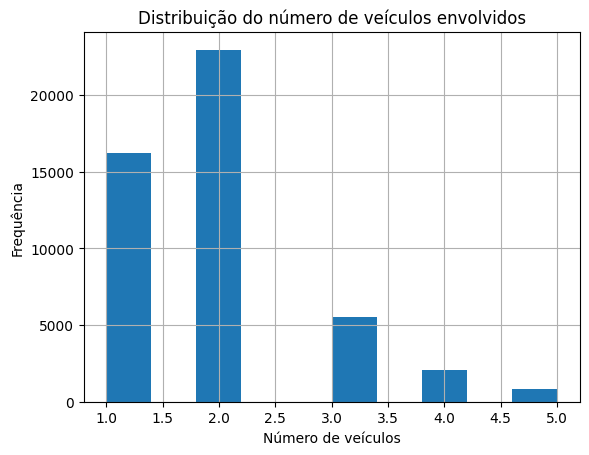

In [ ]:
# Exibir histograma do número de veículos envolvidos
d_copy['veiculos'].hist()
plt.title("Distribuição do número de veículos envolvidos")
plt.xlabel("Número de veículos")
plt.ylabel("Frequência")
plt.show()


### 3.2 - Gráfico de dispersão entre a quilometragem das vias dos acidentes e o número de feridos graves:

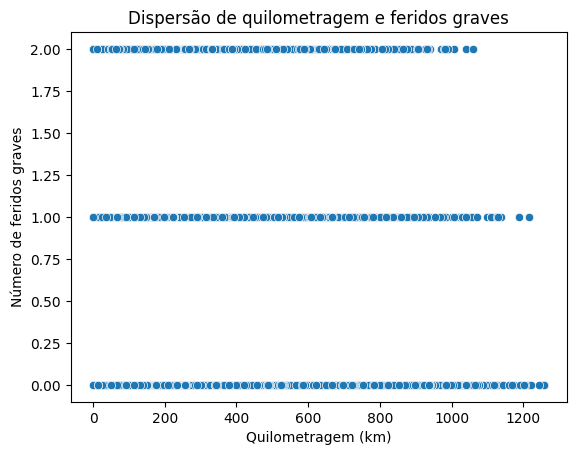

In [ ]:
# Gráfico de dispersão entre a quilometragem (km) e o número de feridos graves
sns.scatterplot(x='km', y='feridos_graves', data=d_copy)
plt.title("Dispersão de quilometragem e feridos graves")
plt.xlabel("Quilometragem (km)")
plt.ylabel("Número de feridos graves")
plt.show()


### 3.3 - Gráfico Boxplot para veículos, km e feridos graves:

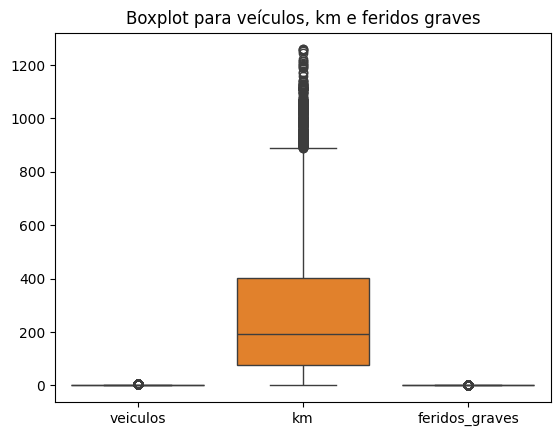

In [ ]:
# Boxplot para várias colunas
sns.boxplot(data=d_copy[['veiculos', 'km', 'feridos_graves']])
plt.title("Boxplot para veículos, km e feridos graves")
plt.show()


### 3.4 - Número de acidentes por Unidade Federativa (UF):

Ao analisar os dados de acidentes de trânsito por estado, identificamos uma disparidade significativa entre as regiões brasileiras. Essa variação nos números levanta questões importantes sobre os fatores que influenciam a ocorrência de acidentes, como infraestrutura viária, legislação e hábitos de condução. Os estados do Eixo Sul-Sudeste, os mais urbanizados do Brasil, lideram o número de acidentes.

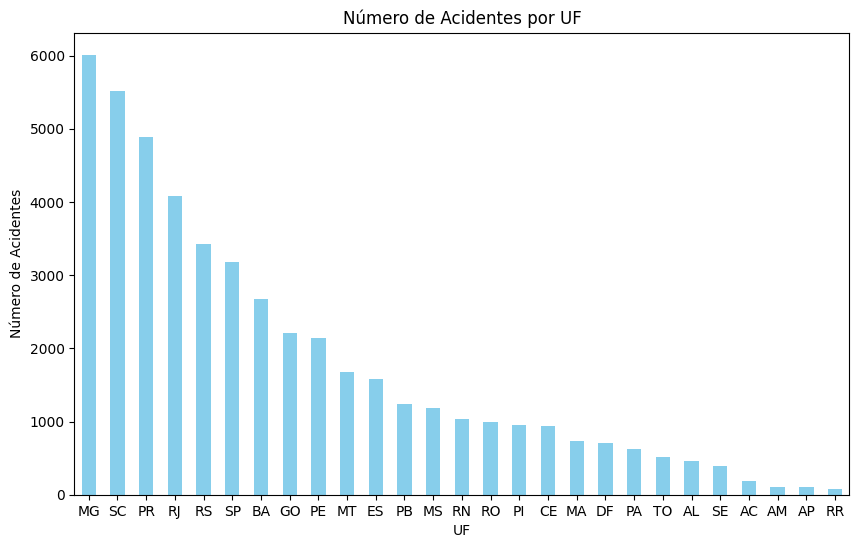

In [ ]:
acidentes_uf = d_copy['uf'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
acidentes_uf.plot(kind='bar', color='skyblue')
plt.title('Número de Acidentes por UF')
plt.xlabel('UF')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=0)
plt.show()

### 3.5 - Número de acidentes por município:

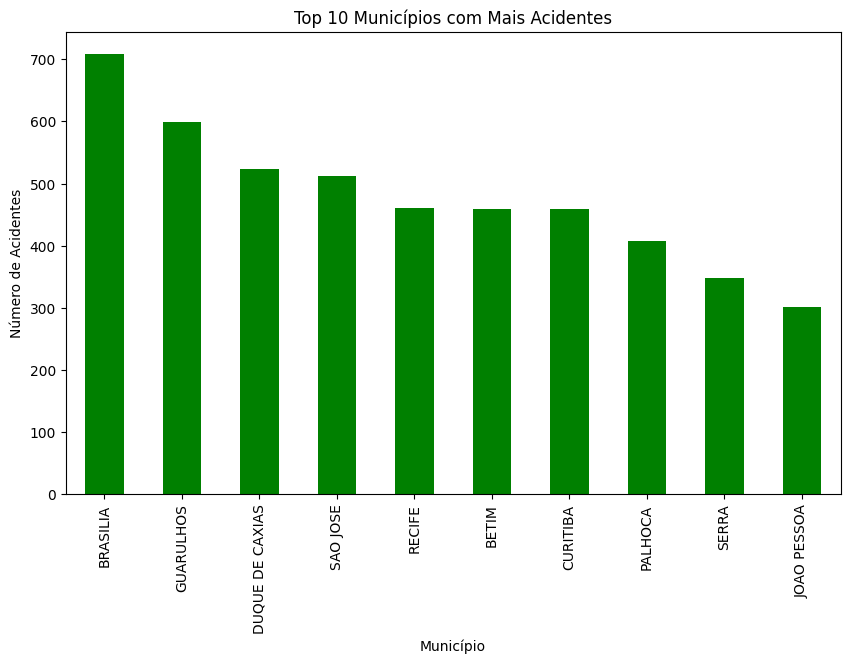

In [ ]:
acidentes_municipio = d_copy['municipio'].value_counts().head(10)

plt.figure(figsize=(10, 6))
acidentes_municipio.plot(kind='bar', color='green')
plt.title('Top 10 Municípios com Mais Acidentes')
plt.xlabel('Município')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.show()


### 3.6 - Porcentagem de Mortes por Município em Relação ao Total de Mortes:

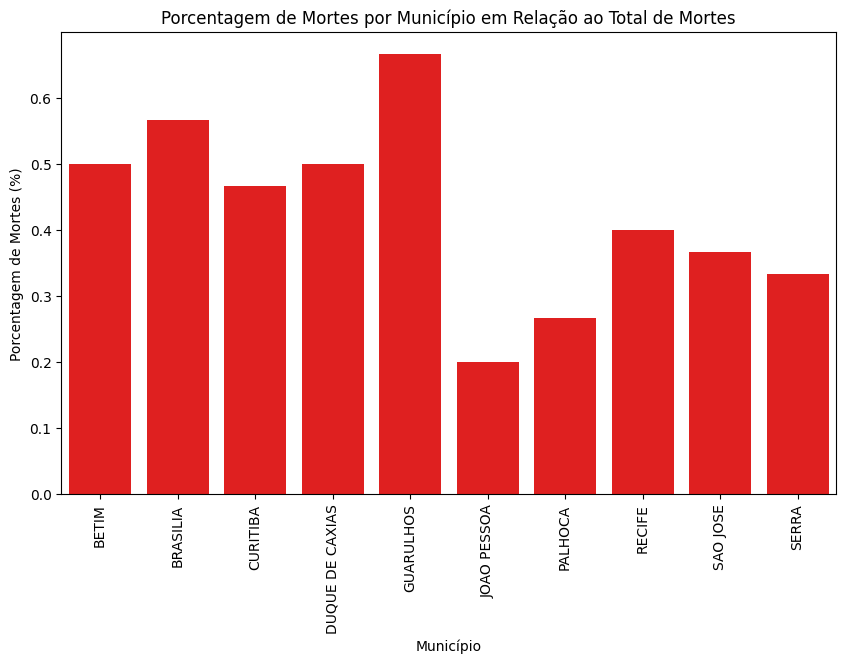

In [ ]:
# 1. Calcular o total de mortes por município
mortes_por_municipio = d_copy.groupby('municipio')['mortos'].sum().reset_index()

# 2. Ordenar pelo top 10 municípios com mais acidentes
top_municipios = d_copy['municipio'].value_counts().head(10).index

# 3. Filtrar os dados para mostrar apenas esses municípios
mortes_top_municipios = mortes_por_municipio[mortes_por_municipio['municipio'].isin(top_municipios)].copy()

# 4. Calcular o total de mortes no dataset
total_mortes = d_copy['mortos'].sum()

# 5. Calcular a porcentagem de mortes por município (usando .loc para evitar o warning)
mortes_top_municipios.loc[:, 'percentual_mortes'] = (mortes_top_municipios['mortos'] / total_mortes) * 100

# 6. Visualizar em um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='municipio', y='percentual_mortes', data=mortes_top_municipios, color='red')
plt.title('Porcentagem de Mortes por Município em Relação ao Total de Mortes')
plt.xlabel('Município')
plt.ylabel('Porcentagem de Mortes (%)')
plt.xticks(rotation=90)
plt.show()


### 3.7 - Tipos de acidentes mais frequentes:

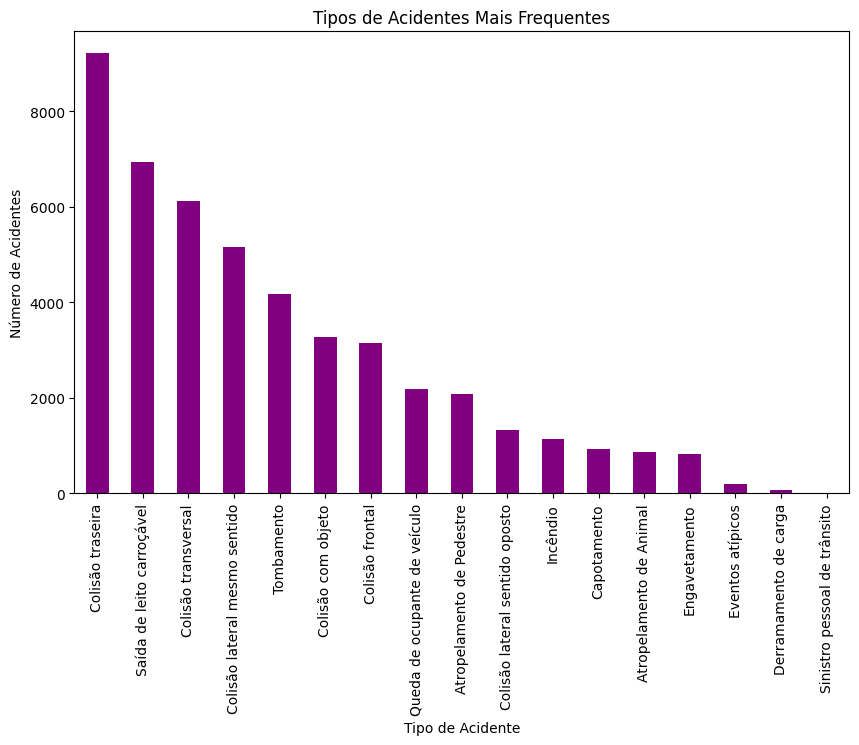

In [ ]:
tipos_acidente = d_copy['tipo_acidente'].value_counts()

plt.figure(figsize=(10, 6))
tipos_acidente.plot(kind='bar', color='purple')
plt.title('Tipos de Acidentes Mais Frequentes')
plt.xlabel('Tipo de Acidente')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.show()


### 3.8 - Causas de acidente mais frequentes:

O gráfico apresentado evidencia que a maior parte dos acidentes de trânsito está diretamente relacionada a falhas humanas. A imprudência ao volante, como não manter distância segura do veículo da frente e realizar manobras arriscadas, se destaca como um fator determinante. Além disso, o consumo de álcool e a falta de atenção do condutor contribuem significativamente para o número de ocorrências.

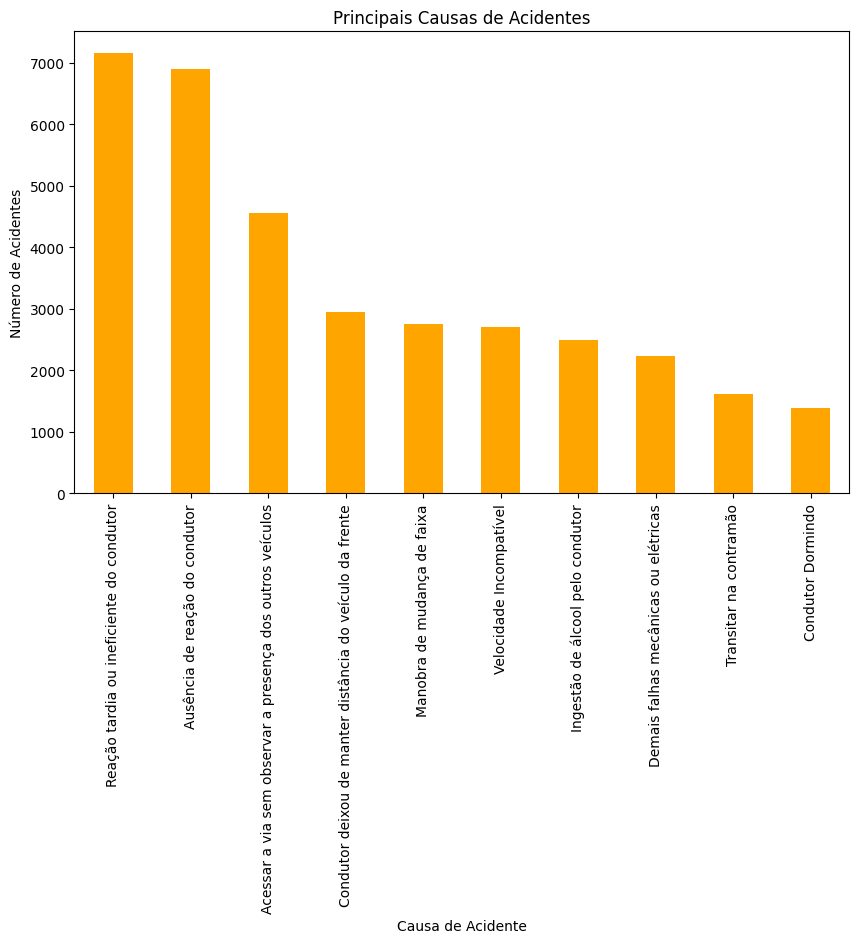

In [ ]:
causas_acidente = d_copy['causa_acidente'].value_counts().head(10)

plt.figure(figsize=(10, 6))
causas_acidente.plot(kind='bar', color='orange')
plt.title('Principais Causas de Acidentes')
plt.xlabel('Causa de Acidente')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.show()


### 3.9 - Acidentes por condição meteorológica:


A análise dos dados revela uma descoberta surpreendente: a maioria dos acidentes ocorre em dias com céu claro, contrariando a percepção comum de que o clima adverso é o principal fator. Embora condições como chuva e neblina aumentem o risco, outros elementos como falhas humanas, estado das vias e características dos veículos parecem ter um impacto mais significativo na ocorrência de acidentes. Para uma compreensão mais completa, é necessário aprofundar a análise, cruzando os dados com informações sobre horário, local e tipo de acidente, a fim de identificar os verdadeiros causadores e propor medidas de segurança mais eficazes. Essa descoberta destaca a complexidade do problema e a necessidade de uma abordagem multifatorial para a prevenção de acidentes de trânsito.

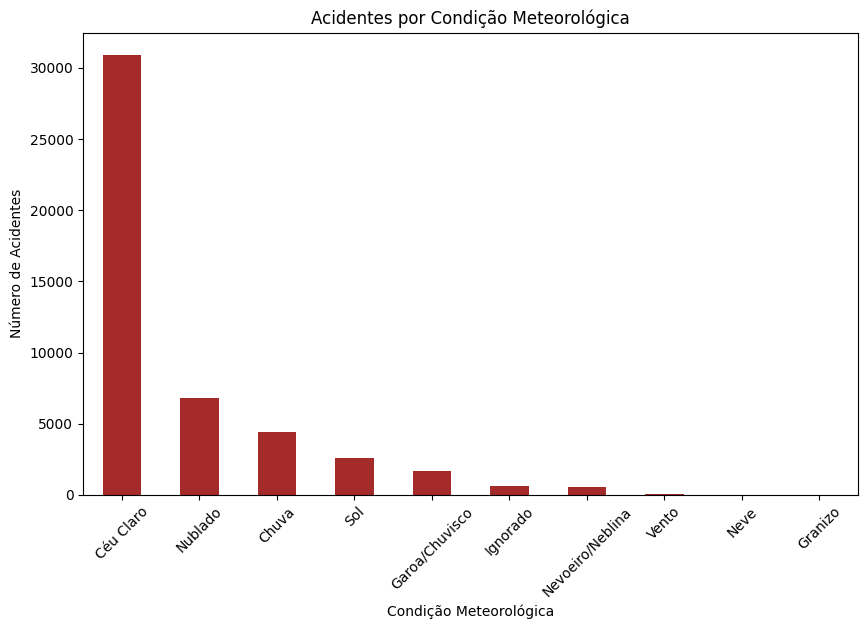

In [ ]:
condicoes_metereologicas = d_copy['condicao_metereologica'].value_counts()

plt.figure(figsize=(10, 6))
condicoes_metereologicas.plot(kind='bar', color='brown')
plt.title('Acidentes por Condição Meteorológica')
plt.xlabel('Condição Meteorológica')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.show()



### 3.10 - Número de feridos leves por UF:


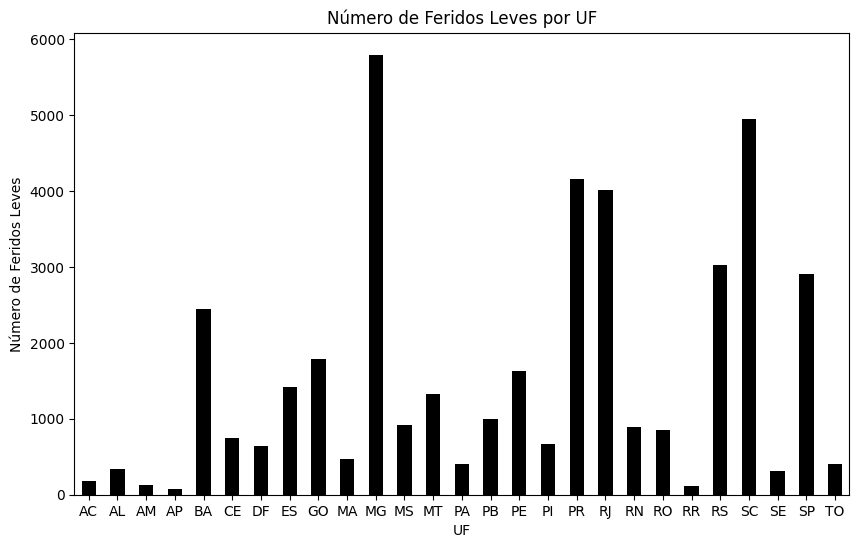

In [ ]:
feridos_leves_uf = df.groupby('uf')['feridos_leves'].sum()

plt.figure(figsize=(10, 6))
feridos_leves_uf.plot(kind='bar', color='black')
plt.title('Número de Feridos Leves por UF')
plt.xlabel('UF')
plt.ylabel('Número de Feridos Leves')
plt.xticks(rotation=0)
plt.show()



### 3.11 - Horários com mais acidentes:

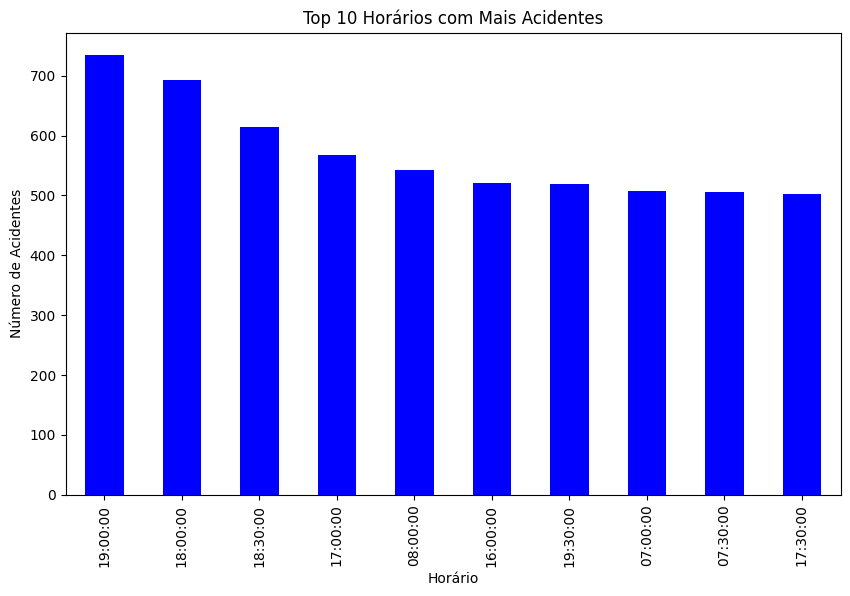

In [ ]:
acidentes_horario = d_copy['horario'].value_counts().head(10)

plt.figure(figsize=(10, 6))
acidentes_horario.plot(kind='bar', color='blue')
plt.title('Top 10 Horários com Mais Acidentes')
plt.xlabel('Horário')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.show()


### 3.12 - Fases do dia com mais acidentes:

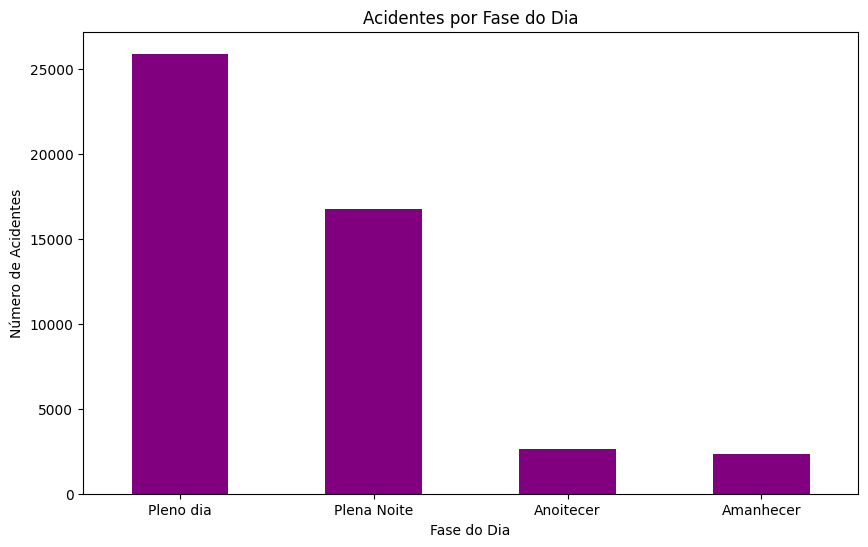

In [ ]:
fase_dia_acidentes = d_copy['fase_dia'].value_counts()

plt.figure(figsize=(10, 6))
fase_dia_acidentes.plot(kind='bar', color='purple')
plt.title('Acidentes por Fase do Dia')
plt.xlabel('Fase do Dia')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=0)
plt.show()


### 3.13 - Acidentes em estradas com pista simples x pista dupla:


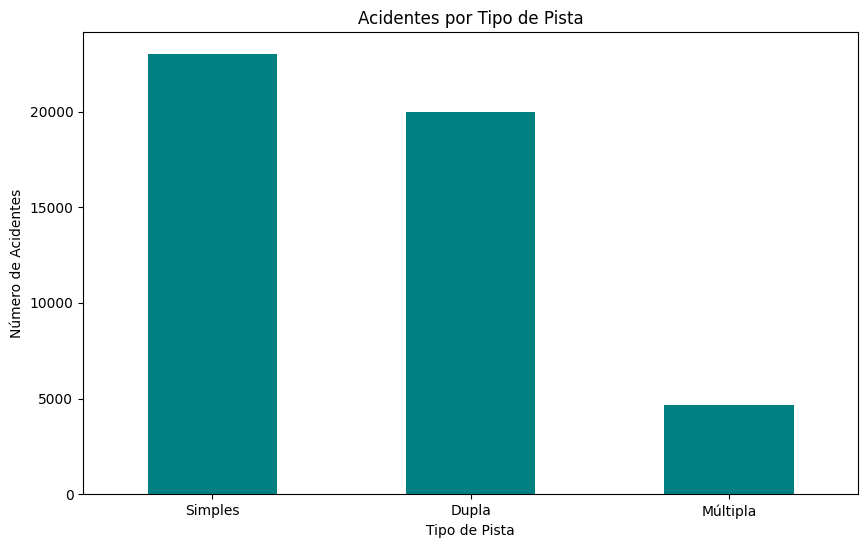

In [ ]:
acidentes_tipo_pista = d_copy['tipo_pista'].value_counts()

plt.figure(figsize=(10, 6))
acidentes_tipo_pista.plot(kind='bar', color='teal')
plt.title('Acidentes por Tipo de Pista')
plt.xlabel('Tipo de Pista')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=0)
plt.show()


### 3.14 - Acidentes por classificação (leve, grave, etc.):

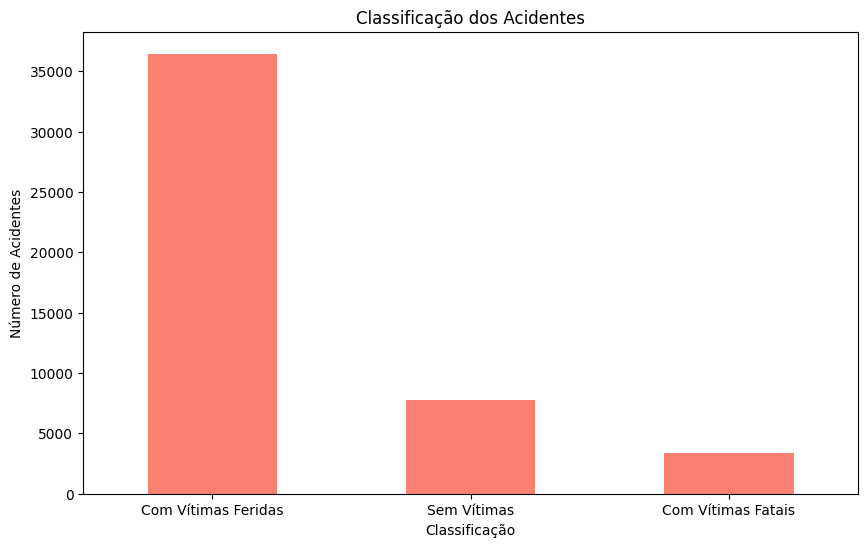

In [ ]:
classificacao_acidente = d_copy['classificacao_acidente'].value_counts()

plt.figure(figsize=(10, 6))
classificacao_acidente.plot(kind='bar', color='salmon')
plt.title('Classificação dos Acidentes')
plt.xlabel('Classificação')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=0)
plt.show()

### 3.15 - Acidentes em áreas com uso do solo:

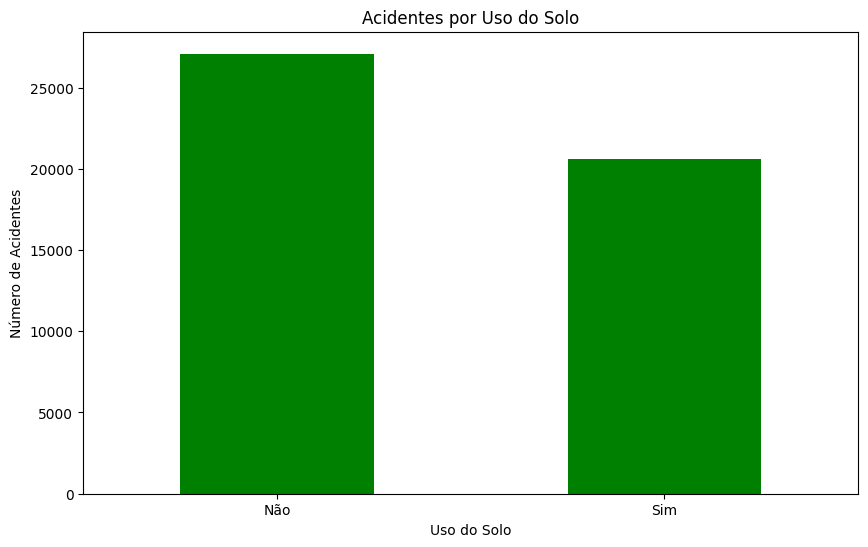

In [ ]:
acidentes_uso_solo = df['uso_solo'].value_counts()

plt.figure(figsize=(10, 6))
acidentes_uso_solo.plot(kind='bar', color='green')
plt.title('Acidentes por Uso do Solo')
plt.xlabel('Uso do Solo')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=0)
plt.show()


### 3.16 - Número médio de veículos envolvidos por tipo de acidente:

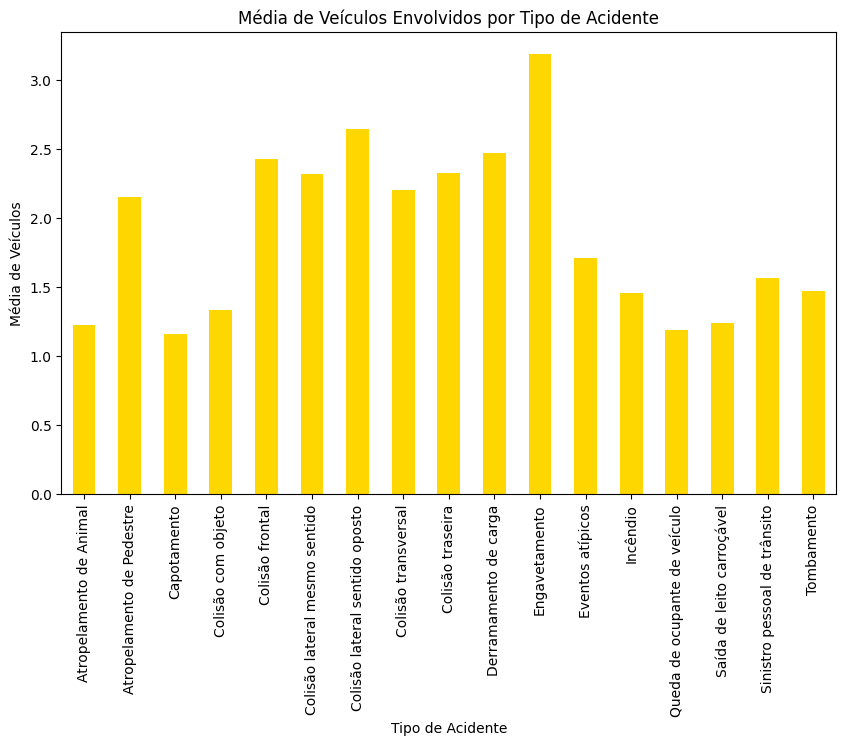

In [ ]:
veiculos_por_tipo_acidente = d_copy.groupby('tipo_acidente')['veiculos'].mean()

plt.figure(figsize=(10, 6))
veiculos_por_tipo_acidente.plot(kind='bar', color='gold')
plt.title('Média de Veículos Envolvidos por Tipo de Acidente')
plt.xlabel('Tipo de Acidente')
plt.ylabel('Média de Veículos')
plt.xticks(rotation=90)
plt.show()


### 3.17 - Correlação entre número de feridos e mortos:

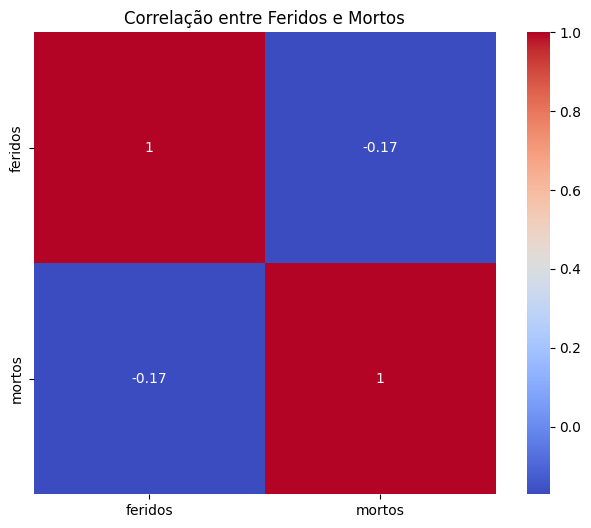

In [ ]:
correlacao_feridos_mortos = d_copy[['feridos', 'mortos']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_feridos_mortos, annot=True, cmap='coolwarm', square=True)
plt.title('Correlação entre Feridos e Mortos')
plt.show()


### 3.18 - Média de mortes por km percorrido:

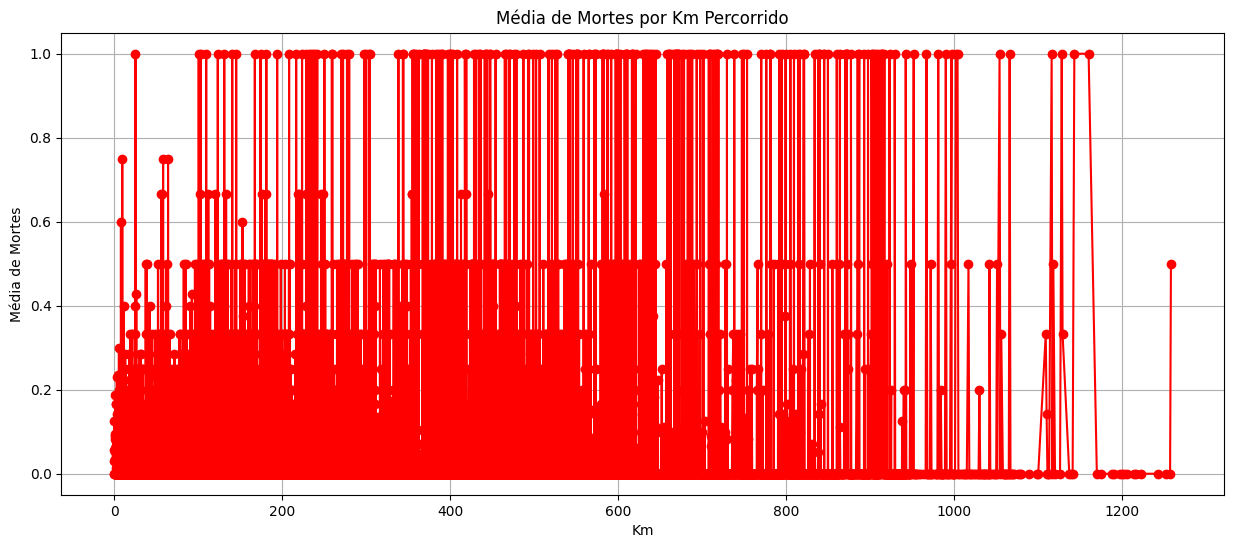

In [ ]:
mortos_por_km = d_copy.groupby('km')['mortos'].mean()

plt.figure(figsize=(15, 6))
mortos_por_km.plot(kind='line', marker='o', color='red')
plt.title('Média de Mortes por Km Percorrido')
plt.xlabel('Km')
plt.ylabel('Média de Mortes')
plt.grid(True)
plt.show()


### 3.19 - Acidentes por dia da semana:

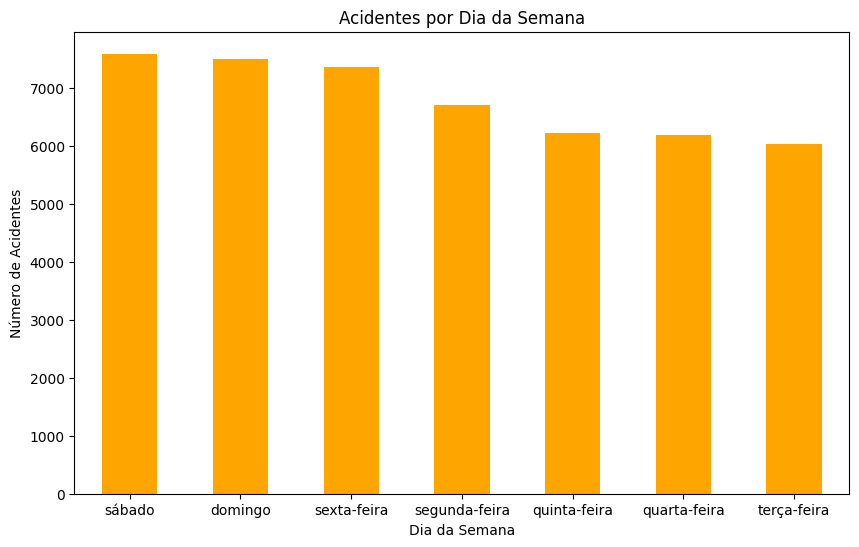

In [ ]:
acidentes_dia_semana = d_copy['dia_semana'].value_counts()

plt.figure(figsize=(10, 6))
acidentes_dia_semana.plot(kind='bar', color='orange')
plt.title('Acidentes por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=0)
plt.show()


### 3.20 - Distribuição de acidentes por sentido da via:

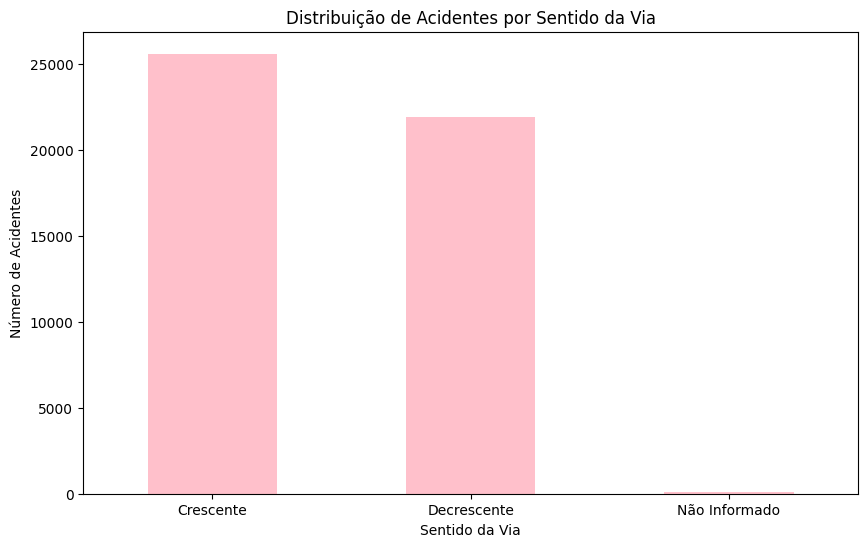

In [ ]:
acidentes_sentido_via = d_copy['sentido_via'].value_counts()

plt.figure(figsize=(10, 6))
acidentes_sentido_via.plot(kind='bar', color='pink')
plt.title('Distribuição de Acidentes por Sentido da Via')
plt.xlabel('Sentido da Via')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=0)
plt.show()


### 3.21 - Proporção de Acidentes Fatais e Não Fatais:





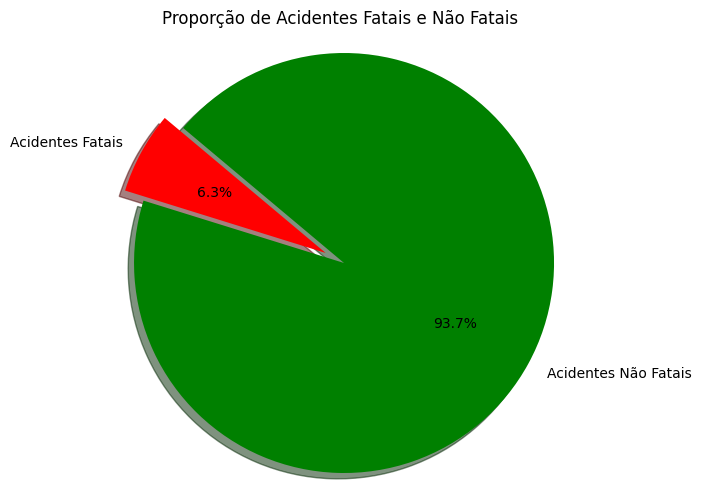

In [ ]:
# Contar o número total de acidentes
total_acidentes = len(d_copy)

# Contar o número de acidentes fatais (onde a coluna 'mortos' é maior que 0)
acidentes_fatais = len(d_copy[d_copy['mortos'] > 0])

# Contar o número de acidentes não fatais
acidentes_nao_fatais = total_acidentes - acidentes_fatais

# Dados para o gráfico de pizza
labels = ['Acidentes Fatais', 'Acidentes Não Fatais']
sizes = [acidentes_fatais, acidentes_nao_fatais]
colors = ['red', 'green']
explode = (0.1, 0)

# Criar o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Proporção de Acidentes Fatais e Não Fatais")
plt.axis('equal')
plt.show()


### 3.22 - Número Total de Mortos por Tipo de Acidente:

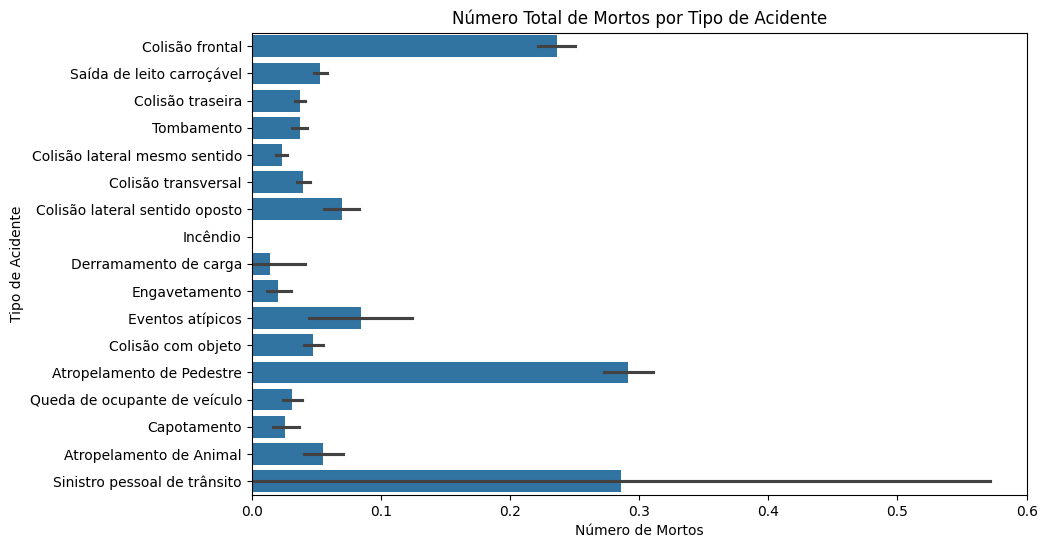

In [ ]:
# Número total de Mortos por tipo de Acidente
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='mortos', y='tipo_acidente', data=d_copy)
plt.title("Número Total de Mortos por Tipo de Acidente")
plt.xlabel("Número de Mortos")
plt.ylabel("Tipo de Acidente")
plt.show()

### 3.23 - Estados com maior taxa de letalidade por acidentes:

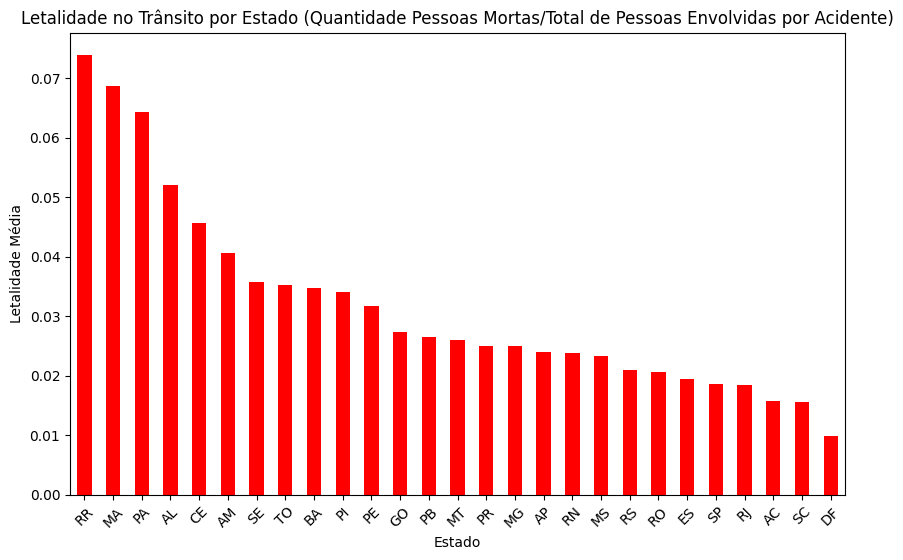

In [ ]:
# 1. Agrupando os dados por estado e calculando a letalidade diretamente (número de mortos / total de pessoas)
letalidade_por_estado = d_copy.groupby('uf').apply(lambda x: (x['mortos'].sum() / x['pessoas'].sum())).sort_values(ascending=False)

# 2. Visualizando os estados com maiores letalidades no trânsito
plt.figure(figsize=(10, 6))
letalidade_por_estado.plot(kind='bar', color='red')
plt.title('Letalidade no Trânsito por Estado (Quantidade Pessoas Mortas/Total de Pessoas Envolvidas por Acidente)')
plt.xlabel('Estado')
plt.ylabel('Letalidade Média')
plt.xticks(rotation=45)
plt.show()


Foram analisadas as relações entre variáveis referentes diretamente a acidentes de trânsito, como o número de pessoas envolvidas, mortos, feridos (leves e graves), ilesos, ignorados e veículos. As correlações entre essas variáveis são calculadas, destacando as conexões mais fortes, como a possível influência do número de veículos no aumento de feridos ou mortos.

Além disso, as distribuições dos mortos e feridos são comparadas com o número de veículos envolvidos nos acidentes, buscando identificar padrões que mostrem o impacto dos veículos nas consequências dos acidentes. A soma dos feridos leves e graves também é comparada com o número de mortos para entender melhor a relação entre o total de feridos e as fatalidades.

Por fim, é realizado a relação entre o número total de pessoas envolvidas e os diferentes tipos de consequências (mortos, feridos leves e graves), mostrando como o número de pessoas pode influenciar a gravidade dos resultados em acidentes de trânsito.

### 3.24 - Mapa de calor das correlações entre colunas selecionadas.

                 pessoas    mortos  feridos_leves  feridos_graves    ilesos  \
pessoas         1.000000  0.088665       0.282136        0.111959  0.625301   
mortos          0.088665  1.000000      -0.165265       -0.021786 -0.044184   
feridos_leves   0.282136 -0.165265       1.000000       -0.272154 -0.107512   
feridos_graves  0.111959 -0.021786      -0.272154        1.000000 -0.086868   
ilesos          0.625301 -0.044184      -0.107512       -0.086868  1.000000   
ignorados       0.220746  0.091569      -0.126866       -0.001919 -0.053451   
feridos         0.361093 -0.171371       0.763145        0.286943 -0.163395   
veiculos        0.551126  0.102855      -0.003360        0.066337  0.375549   

                ignorados   feridos  veiculos  
pessoas          0.220746  0.361093  0.551126  
mortos           0.091569 -0.171371  0.102855  
feridos_leves   -0.126866  0.763145 -0.003360  
feridos_graves  -0.001919  0.286943  0.066337  
ilesos          -0.053451 -0.163395  0.375549  


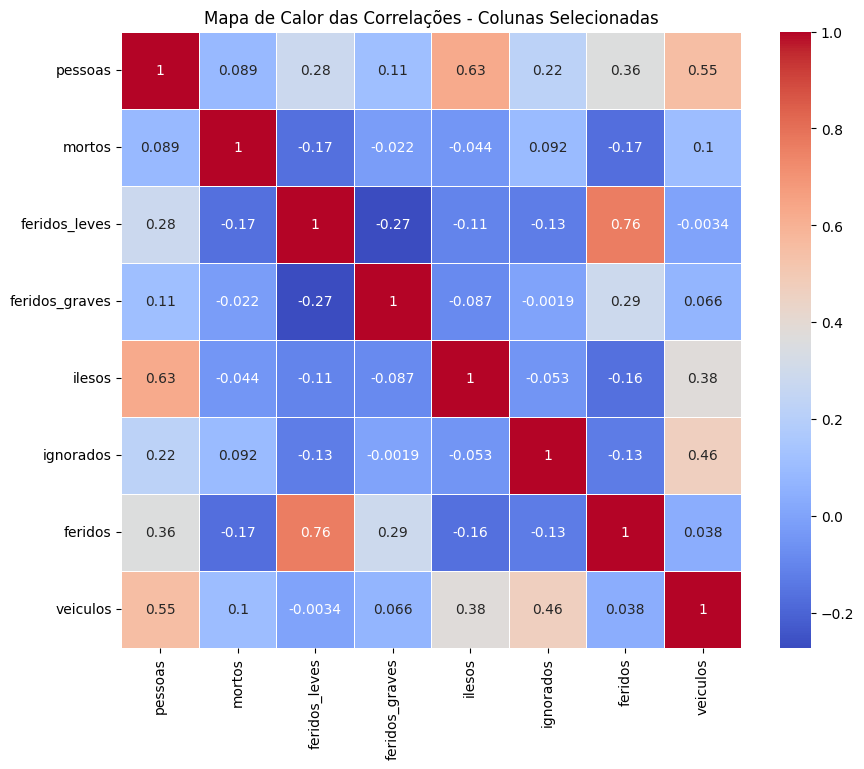

In [ ]:
# 3. Selecionando as colunas de interesse
colunas_interesse = [
    'pessoas', 'mortos', 'feridos_leves', 'feridos_graves',
    'ilesos', 'ignorados', 'feridos', 'veiculos'
]

# Filtrando o DataFrame para incluir apenas as colunas especificadas
d_filtrado = d_copy[colunas_interesse]

# Calculando a correlação entre essas colunas
correlacao = d_filtrado.corr()

# Exibindo a matriz de correlação
print(correlacao)

# 4. Mapa de calor para visualizar correlações
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor das Correlações - Colunas Selecionadas')
plt.show()

### 3.25 - Distribuição de mortos e feridos por número de pessoas envolvidas.

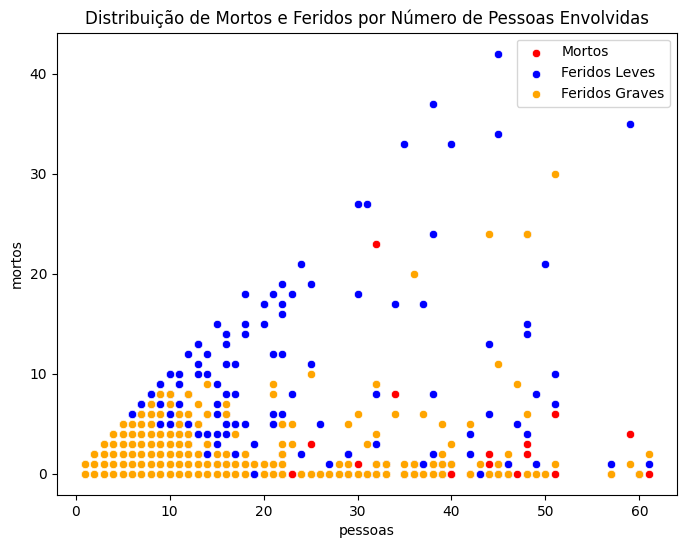

In [ ]:
# Comparar número de pessoas e diferentes categorias de feridos/mortos
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pessoas', y='mortos', data=df, color='red', label='Mortos')
sns.scatterplot(x='pessoas', y='feridos_leves', data=df, color='blue', label='Feridos Leves')
sns.scatterplot(x='pessoas', y='feridos_graves', data=df, color='orange', label='Feridos Graves')
plt.title('Distribuição de Mortos e Feridos por Número de Pessoas Envolvidas')
plt.legend()
plt.show()


### 3.26 - Distribuição de Mortos e Feridos por Número de Veículos:

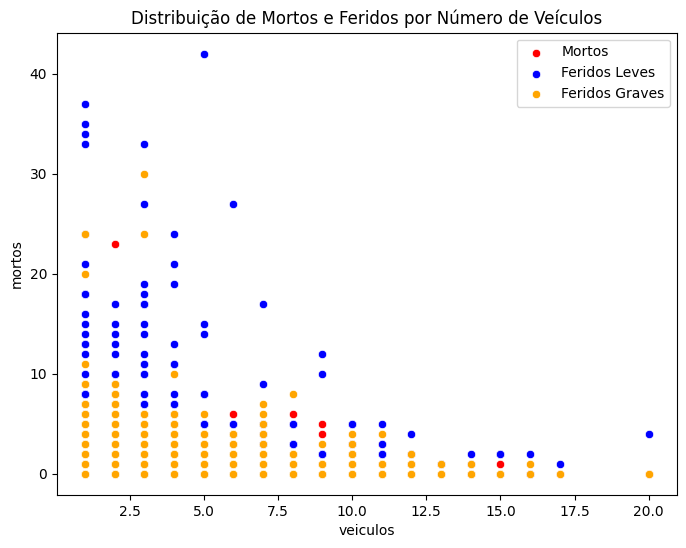

In [ ]:
# Analisar distribuição de mortos e feridos em relação ao número de veículos envolvidos
plt.figure(figsize=(8, 6))
sns.scatterplot(x='veiculos', y='mortos', data=df, color='red', label='Mortos')
sns.scatterplot(x='veiculos', y='feridos_leves', data=df, color='blue', label='Feridos Leves')
sns.scatterplot(x='veiculos', y='feridos_graves', data=df, color='orange', label='Feridos Graves')
plt.title('Distribuição de Mortos e Feridos por Número de Veículos')
plt.legend()
plt.show()

### 3.27 - Relação entre Feridos (Leves + Graves) e Mortos:

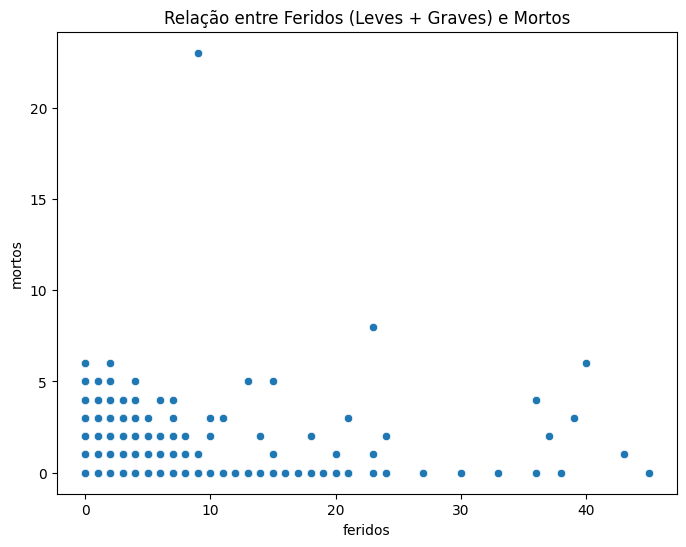

In [ ]:
# Comparar a soma dos feridos (leves + graves) com mortos
df['feridos'] = df['feridos_leves'] + df['feridos_graves']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='feridos', y='mortos', data=df)
plt.title('Relação entre Feridos (Leves + Graves) e Mortos')
plt.show()

### 3.28 - Distribuição de Mortos e Feridos por Número de Pessoas Envolvidas:

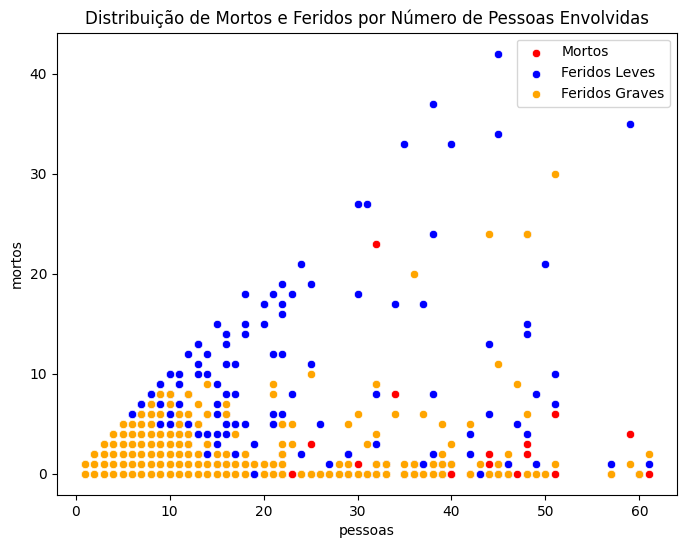

In [ ]:
# Comparar número de pessoas e diferentes categorias de feridos/mortos
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pessoas', y='mortos', data=df, color='red', label='Mortos')
sns.scatterplot(x='pessoas', y='feridos_leves', data=df, color='blue', label='Feridos Leves')
sns.scatterplot(x='pessoas', y='feridos_graves', data=df, color='orange', label='Feridos Graves')
plt.title('Distribuição de Mortos e Feridos por Número de Pessoas Envolvidas')
plt.legend()
plt.show()

## 4. (M) Modelagem


In [ ]:
df_final = d_copy.copy()

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 1 to 47702
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      47621 non-null  float64
 1   data_inversa            47621 non-null  object 
 2   dia_semana              47621 non-null  object 
 3   horario                 47621 non-null  object 
 4   uf                      47621 non-null  object 
 5   br                      47621 non-null  int64  
 6   km                      47621 non-null  float64
 7   municipio               47621 non-null  object 
 8   causa_acidente          47621 non-null  object 
 9   tipo_acidente           47621 non-null  object 
 10  classificacao_acidente  47621 non-null  object 
 11  fase_dia                47621 non-null  object 
 12  sentido_via             47621 non-null  object 
 13  condicao_metereologica  47621 non-null  object 
 14  tipo_pista              47621 non-null  obj

In [ ]:
# Selecionar apenas colunas categóricas (tipo 'object')
categorical_columns = df_final.select_dtypes(include=['object']).columns

# Verificar a quantidade de valores únicos em cada coluna categórica
unique_values_categorical = df_final[categorical_columns].nunique()

# Exibir o resultado
print("Quantidade de valores únicos em colunas categóricas:")
print(unique_values_categorical)

Quantidade de valores únicos em colunas categóricas:
data_inversa               244
dia_semana                   7
horario                   1373
uf                          27
municipio                 1759
causa_acidente              69
tipo_acidente               17
classificacao_acidente       3
fase_dia                     4
sentido_via                  3
condicao_metereologica      10
tipo_pista                   3
tracado_via                524
uso_solo                     2
regional                    27
delegacia                  152
uop                        393
dtype: int64


Coluna com alta cardinalidade que será retirada

In [ ]:
df_final['tracado_via'].unique()

array(['Reta', 'Curva', 'Declive;Reta', 'Aclive;Curva', 'Reta;Declive',
       'Retorno Regulamentado', 'Curva;Declive', 'Declive;Curva',
       'Aclive', 'Reta;Aclive', 'Retorno Regulamentado;Reta', 'Viaduto',
       'Curva;Viaduto', 'Reta;Retorno Regulamentado',
       'Interseção de Vias;Reta', 'Aclive;Reta', 'Reta;Ponte;Declive',
       'Interseção de Vias;Rotatória', 'Rotatória;Reta', 'Ponte',
       'Reta;Ponte', 'Rotatória', 'Declive', 'Interseção de Vias',
       'Curva;Em Obras;Desvio Temporário', 'Declive;Reta;Ponte',
       'Reta;Interseção de Vias;Em Obras', 'Aclive;Retorno Regulamentado',
       'Retorno Regulamentado;Reta;Interseção de Vias', 'Curva;Aclive',
       'Reta;Em Obras;Desvio Temporário', 'Curva;Aclive;Em Obras',
       'Curva;Em Obras', 'Reta;Em Obras;Ponte', 'Reta;Rotatória',
       'Curva;Interseção de Vias', 'Reta;Viaduto',
       'Declive;Interseção de Vias', 'Reta;Interseção de Vias',
       'Aclive;Rotatória;Curva', 'Aclive;Ponte;Reta',
       'Reta;Desv

Remoção de colunas julgadas como desnecessárias para o primeiro teste

In [ ]:
# Remover as colunas 'tracado_via' e 'id'
df_final = df_final.drop(columns=['tracado_via', 'id'])

In [ ]:
# Remover as colunas 'horario' e 'data_inversa'
df_final = df_final.drop(columns=['horario', 'data_inversa'])

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 1 to 47702
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dia_semana              47621 non-null  object 
 1   uf                      47621 non-null  object 
 2   br                      47621 non-null  int64  
 3   km                      47621 non-null  float64
 4   municipio               47621 non-null  object 
 5   causa_acidente          47621 non-null  object 
 6   tipo_acidente           47621 non-null  object 
 7   classificacao_acidente  47621 non-null  object 
 8   fase_dia                47621 non-null  object 
 9   sentido_via             47621 non-null  object 
 10  condicao_metereologica  47621 non-null  object 
 11  tipo_pista              47621 non-null  object 
 12  uso_solo                47621 non-null  object 
 13  pessoas                 47621 non-null  int64  
 14  mortos                  47621 non-null  int

Pipeline de processamento para nós podermos testar a previsão com várias colunas e ver qual faz sentido

In [ ]:
# Função para rodar o pipeline de classificação e regressão
def process_modeling(data, target, model_type):
    """
    Função para processamento de modelagem preditiva com diferentes tipos de problemas (classificação ou regressão).
    Retorna um DataFrame com os valores reais e preditos, e um dicionário com as métricas.
    """
    # Separando X e y
    X = data.drop(columns=[target])
    y = data[target]

    # Aplicando LabelEncoder nas colunas categóricas
    label_encoders = {}
    for col in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

    # Divisão treino-teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Escalando os dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Modelagem
    if model_type == "classification":
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Métricas
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Criando o DataFrame com os valores reais e preditos
        results_df = pd.DataFrame({'Real': y_test, 'Predito': y_pred})
        results_df['target'] = target

        # Retornando o DataFrame e as métricas
        return results_df, {"target": target, "model_type": model_type, "accuracy": accuracy, "f1_score": f1}

    elif model_type == "regression":
        if target == 'feridos_graves':
            model = GradientBoostingRegressor(random_state=42)
        else:
            model = RandomForestRegressor(random_state=42)

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Métricas
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Criando o DataFrame com os valores reais e preditos
        results_df = pd.DataFrame({'Real': y_test, 'Predito': y_pred})
        results_df['target'] = target

        # Retornando o DataFrame e as métricas
        return results_df, {"target": target, "model_type": model_type, "rmse": rmse, "mae": mae, "r2_score": r2}

Vizualizando os dados reais e preditos, paraas colunas escolhidas

In [ ]:
# Adicionando as novas colunas no pipeline
results_df_classificacao, metrics_classificacao = process_modeling(df_final, 'classificacao_acidente', 'classification')
results_df_feridos_graves, metrics_feridos_graves = process_modeling(df_final, 'feridos_graves', 'classification')
results_df_veiculos, metrics_veiculos = process_modeling(df_final, 'veiculos', 'classification')
results_df_tipo_acidente, metrics_tipo_acidente = process_modeling(df_final, 'tipo_acidente', 'classification')
results_df_condicao_metereologica, metrics_condicao_metereologica = process_modeling(df_final, 'condicao_metereologica', 'classification')
results_df_tipo_pista, metrics_tipo_pista = process_modeling(df_final, 'tipo_pista', 'classification')
results_df_causa_acidente, metrics_causa_acidente = process_modeling(df_final, 'causa_acidente', 'classification')

# Exibindo uma amostra dos dados
display(results_df_classificacao.head(10))
display(results_df_feridos_graves.head(10))
display(results_df_veiculos.head(10))
display(results_df_tipo_acidente.head(10))
display(results_df_condicao_metereologica.head(10))
display(results_df_tipo_pista.head(10))
display(results_df_causa_acidente.head(10))

,Real,Predito,target
1540,Com Vítimas Feridas,Com Vítimas Feridas,classificacao_acidente
20222,Com Vítimas Feridas,Com Vítimas Feridas,classificacao_acidente
46407,Com Vítimas Feridas,Com Vítimas Feridas,classificacao_acidente
10211,Com Vítimas Feridas,Com Vítimas Feridas,classificacao_acidente
38103,Com Vítimas Feridas,Com Vítimas Feridas,classificacao_acidente
13878,Com Vítimas Feridas,Com Vítimas Feridas,classificacao_acidente
46056,Com Vítimas Feridas,Com Vítimas Feridas,classificacao_acidente
46035,Com Vítimas Feridas,Com Vítimas Feridas,classificacao_acidente
20030,Com Vítimas Fatais,Com Vítimas Feridas,classificacao_acidente
19529,Com Vítimas Feridas,Com Vítimas Feridas,classificacao_acidente


,Real,Predito,target
1540,0,0,feridos_graves
20222,0,0,feridos_graves
46407,0,0,feridos_graves
10211,0,0,feridos_graves
38103,0,0,feridos_graves
13878,1,1,feridos_graves
46056,0,0,feridos_graves
46035,0,0,feridos_graves
20030,1,0,feridos_graves
19529,0,0,feridos_graves


,Real,Predito,target
1540,1,1,veiculos
20222,2,2,veiculos
46407,2,2,veiculos
10211,2,2,veiculos
38103,1,1,veiculos
13878,1,1,veiculos
46056,1,1,veiculos
46035,2,2,veiculos
20030,3,2,veiculos
19529,1,1,veiculos


,Real,Predito,target
1540,Colisão com objeto,Colisão com objeto,tipo_acidente
20222,Colisão lateral mesmo sentido,Colisão lateral mesmo sentido,tipo_acidente
46407,Colisão traseira,Colisão traseira,tipo_acidente
10211,Colisão com objeto,Tombamento,tipo_acidente
38103,Capotamento,Saída de leito carroçável,tipo_acidente
13878,Colisão com objeto,Saída de leito carroçável,tipo_acidente
46056,Saída de leito carroçável,Saída de leito carroçável,tipo_acidente
46035,Colisão traseira,Colisão traseira,tipo_acidente
20030,Colisão frontal,Colisão frontal,tipo_acidente
19529,Colisão com objeto,Saída de leito carroçável,tipo_acidente


,Real,Predito,target
1540,Ignorado,Céu Claro,condicao_metereologica
20222,Céu Claro,Céu Claro,condicao_metereologica
46407,Céu Claro,Céu Claro,condicao_metereologica
10211,Céu Claro,Céu Claro,condicao_metereologica
38103,Céu Claro,Céu Claro,condicao_metereologica
13878,Céu Claro,Céu Claro,condicao_metereologica
46056,Céu Claro,Céu Claro,condicao_metereologica
46035,Nublado,Céu Claro,condicao_metereologica
20030,Céu Claro,Céu Claro,condicao_metereologica
19529,Nublado,Céu Claro,condicao_metereologica


,Real,Predito,target
1540,Dupla,Dupla,tipo_pista
20222,Dupla,Dupla,tipo_pista
46407,Dupla,Dupla,tipo_pista
10211,Dupla,Dupla,tipo_pista
38103,Dupla,Dupla,tipo_pista
13878,Dupla,Dupla,tipo_pista
46056,Dupla,Dupla,tipo_pista
46035,Dupla,Dupla,tipo_pista
20030,Simples,Simples,tipo_pista
19529,Dupla,Dupla,tipo_pista


,Real,Predito,target
1540,Ausência de reação do condutor,Ausência de reação do condutor,causa_acidente
20222,Manobra de mudança de faixa,Reação tardia ou ineficiente do condutor,causa_acidente
46407,Demais falhas mecânicas ou elétricas,Condutor deixou de manter distância do veículo...,causa_acidente
10211,Manobra de mudança de faixa,Demais falhas mecânicas ou elétricas,causa_acidente
38103,Ingestão de álcool pelo condutor,Ausência de reação do condutor,causa_acidente
13878,Demais falhas mecânicas ou elétricas,Reação tardia ou ineficiente do condutor,causa_acidente
46056,Condutor Dormindo,Manobra de mudança de faixa,causa_acidente
46035,Condutor deixou de manter distância do veículo...,Condutor deixou de manter distância do veículo...,causa_acidente
20030,Ultrapassagem Indevida,Transitar na contramão,causa_acidente
19529,Ausência de reação do condutor,Reação tardia ou ineficiente do condutor,causa_acidente


Métricas

In [ ]:
# Tabela de métricas para classificação
metrics_classification_df = pd.DataFrame([
    metrics_classificacao,
    metrics_feridos_graves,
    metrics_veiculos,
    metrics_tipo_acidente,
    metrics_condicao_metereologica,
    metrics_tipo_pista,
    metrics_causa_acidente
])

# Exibindo as métricas
display(metrics_classification_df)

,target,model_type,accuracy,f1_score
0,classificacao_acidente,classification,0.992511,0.992324
1,feridos_graves,classification,0.983272,0.983060
2,veiculos,classification,0.877021,0.869822
3,tipo_acidente,classification,0.514454,0.488358
4,condicao_metereologica,classification,0.648982,0.547791
5,tipo_pista,classification,0.844474,0.840728
6,causa_acidente,classification,0.304403,0.278937


Salvando resultados

In [ ]:
# Salvando as tabelas de valores reais e preditos separadamente
results_df_classificacao.to_excel('resultados_classificacao_acidente.xlsx', index=False)
results_df_feridos_graves.to_excel('resultados_feridos_graves.xlsx', index=False)
results_df_veiculos.to_excel('resultados_veiculos.xlsx', index=False)
results_df_tipo_acidente.to_excel('resultados_tipo_acidente.xlsx', index=False)
results_df_condicao_metereologica.to_excel('resultados_condicao_metereologica.xlsx', index=False)
results_df_tipo_pista.to_excel('resultados_tipo_pista.xlsx', index=False)
results_df_causa_acidente.to_excel('resultados_causa_acidente.xlsx', index=False)

# Salvando as métricas
metrics_classification_df.to_excel('metricas_classificacao.xlsx', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt


Colunas utilizadas para prever classificacao_acidente: ['dia_semana', 'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'uso_solo', 'pessoas', 'veiculos', 'latitude', 'longitude', 'regional', 'delegacia', 'uop']
Acurácia do Decision Tree: 0.68
Acurácia do Random Forest: 0.79
Acurácia do Gradient Boosting: 0.79
Acurácia do XGBoost: 0.79


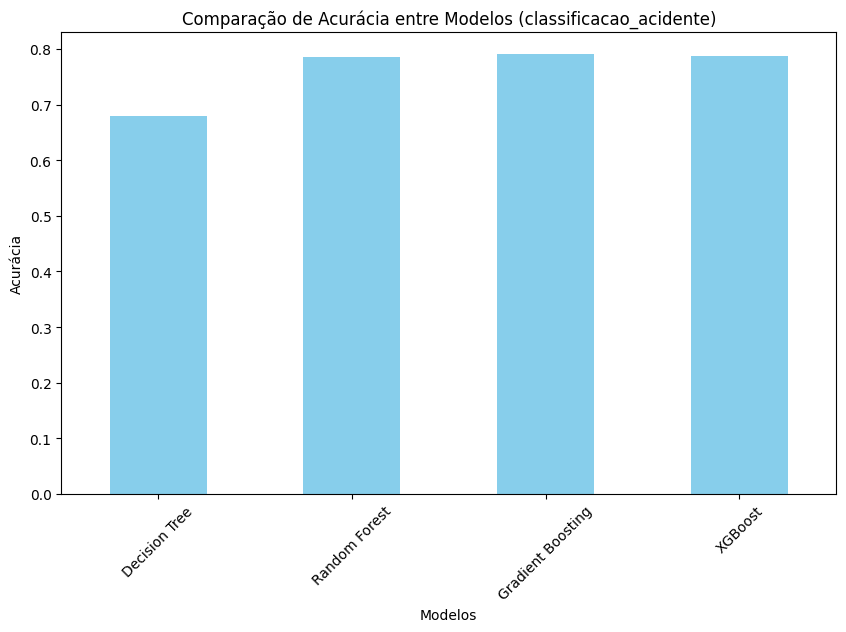


Modelo escolhido para classificacao_acidente: GradientBoostingClassifier
Importância das características:
                    Feature  Importance
6            tipo_acidente    0.448405
5           causa_acidente    0.155526
12                 pessoas    0.106440
13                veiculos    0.083399
14                latitude    0.048790
7                 fase_dia    0.037590
15               longitude    0.034736
11                uso_solo    0.020229
3                       km    0.011115
0               dia_semana    0.009984
2                       br    0.007741
17               delegacia    0.006910
1                       uf    0.005634
10              tipo_pista    0.005451
4                municipio    0.005375
8              sentido_via    0.004531
18                     uop    0.004184
16                regional    0.002635
9   condicao_metereologica    0.001325


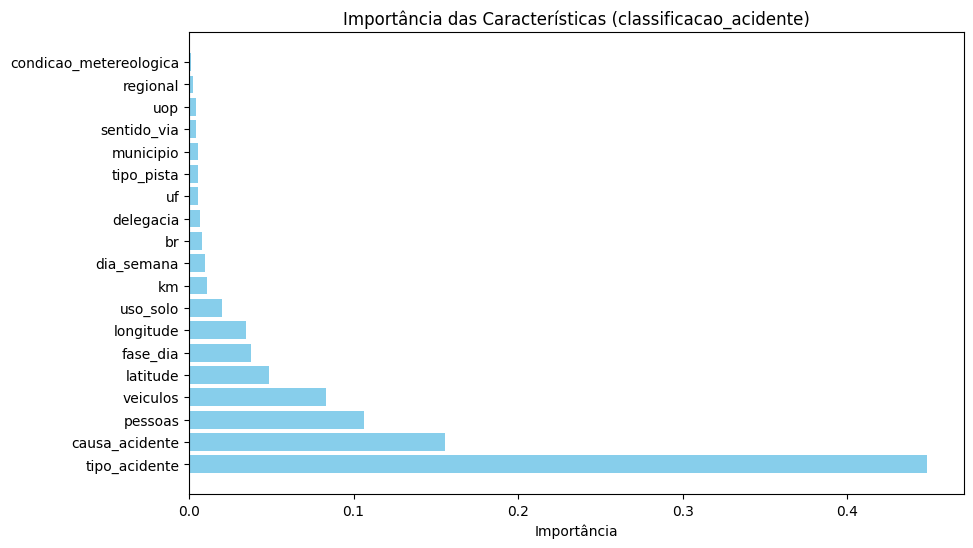


Colunas utilizadas para prever feridos_graves: ['dia_semana', 'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'uso_solo', 'pessoas', 'veiculos', 'latitude', 'longitude', 'regional', 'delegacia', 'uop']
Acurácia do Decision Tree: 0.65
Acurácia do Random Forest: 0.77
Acurácia do Gradient Boosting: 0.78
Acurácia do XGBoost: 0.77


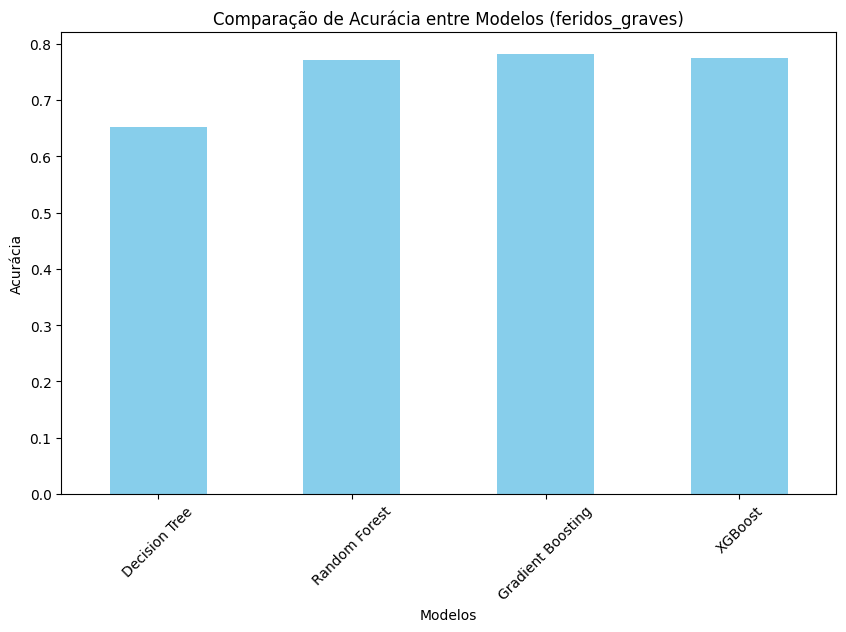


Modelo escolhido para feridos_graves: GradientBoostingClassifier
Importância das características:
                    Feature  Importance
6            tipo_acidente    0.312188
14                latitude    0.134617
12                 pessoas    0.087159
5           causa_acidente    0.066443
15               longitude    0.056344
10              tipo_pista    0.054891
13                veiculos    0.051999
3                       km    0.051113
17               delegacia    0.036025
4                municipio    0.034114
18                     uop    0.032290
2                       br    0.022737
16                regional    0.013997
7                 fase_dia    0.010310
9   condicao_metereologica    0.009523
11                uso_solo    0.007272
8              sentido_via    0.007104
0               dia_semana    0.006048
1                       uf    0.005829


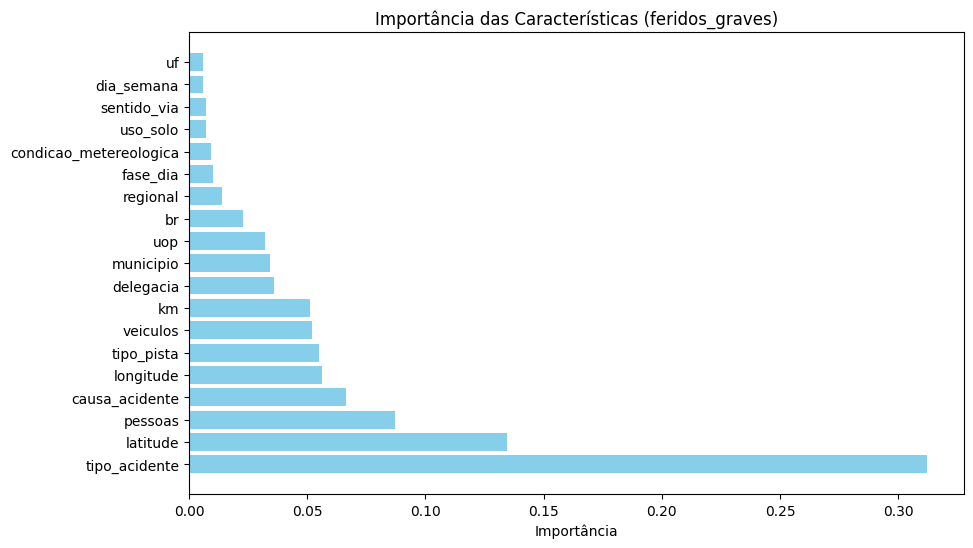


Colunas utilizadas para prever tipo_pista: ['dia_semana', 'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica', 'uso_solo', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional', 'delegacia', 'uop']
Acurácia do Decision Tree: 0.78
Acurácia do Random Forest: 0.84
Acurácia do Gradient Boosting: 0.79
Acurácia do XGBoost: 0.84


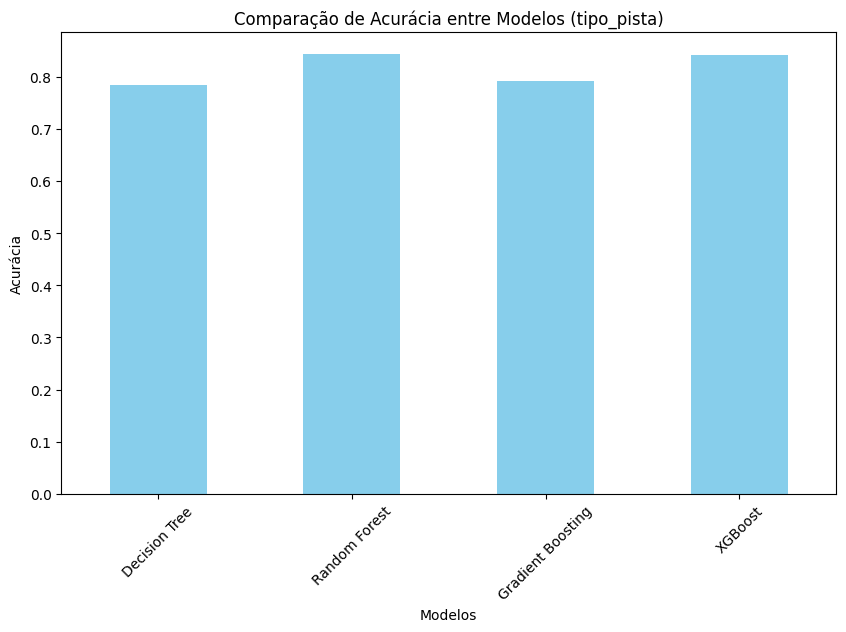


Modelo escolhido para tipo_pista: RandomForestClassifier
Importância das características:
                    Feature  Importance
21               longitude    0.143822
20                latitude    0.128499
3                       km    0.112040
23               delegacia    0.090874
2                       br    0.079787
24                     uop    0.063177
4                municipio    0.042840
5           causa_acidente    0.038895
6            tipo_acidente    0.035339
22                regional    0.034798
1                       uf    0.034597
0               dia_semana    0.029359
11                uso_solo    0.022641
12                 pessoas    0.017963
10  condicao_metereologica    0.017553
16                  ilesos    0.016469
8                 fase_dia    0.015521
19                veiculos    0.013775
14           feridos_leves    0.012786
18                 feridos    0.012185
9              sentido_via    0.010865
17               ignorados    0.008832
15         

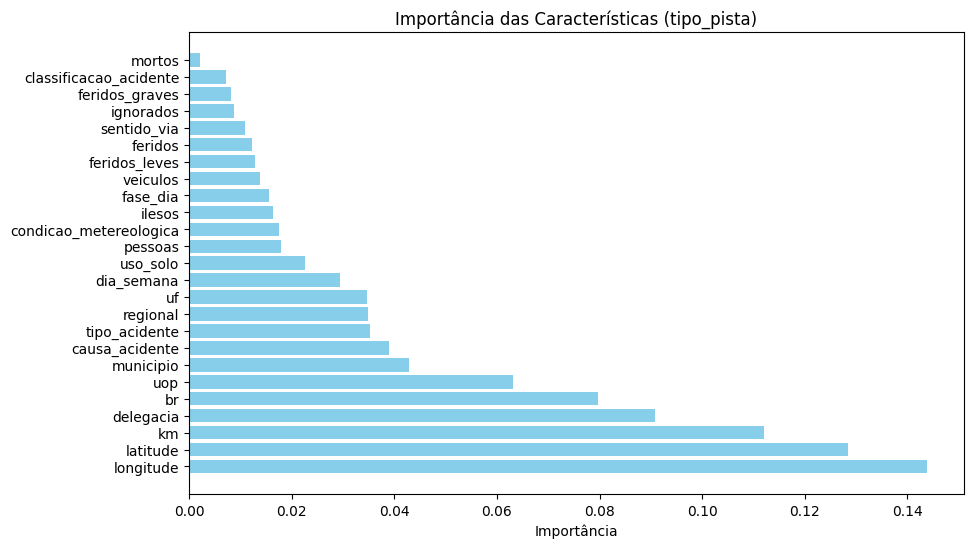

In [ ]:
# Função para aplicar LabelEncoder e salvar mapeamento corretamente
def label_encode_and_map(X, target_name, file_name):
    label_encoders = {}
    mappings = {}

    # Aplicar LabelEncoder nas colunas categóricas de X
    for col in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le
        mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

    # Organizar o mapeamento em formato adequado para o Excel
    with pd.ExcelWriter(file_name) as writer:
        for col, mapping in mappings.items():
            # Criar um DataFrame com as classes e seus valores correspondentes
            mapping_df = pd.DataFrame(list(mapping.items()), columns=['Classe', 'Valor'])
            # Escrever cada mapeamento em uma aba separada no Excel
            mapping_df.to_excel(writer, sheet_name=col, index=False)

    return X, label_encoders

# Função para treinar modelos e salvar o melhor modelo como pickle
def train_and_save_best_model(X_train, X_test, y_train, y_test, target_name):
    models = {
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42)
    }

    accuracies = {}
    best_model = None
    best_accuracy = 0

    # Treinar e avaliar cada modelo
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[name] = accuracy

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

    # Imprimir as acurácias e colunas utilizadas
    print(f"\nColunas utilizadas para prever {target_name}: {X_train.columns.tolist()}")
    for name, accuracy in accuracies.items():
        print(f'Acurácia do {name}: {accuracy:.2f}')

    # Visualizar as acurácias
    pd.Series(accuracies).plot(kind='bar', figsize=(10, 6), color='skyblue')
    plt.xlabel('Modelos')
    plt.ylabel('Acurácia')
    plt.title(f'Comparação de Acurácia entre Modelos ({target_name})')
    plt.xticks(rotation=45)
    plt.show()

    # Salvar o melhor modelo em arquivo pickle
    pickle_filename = f'best_model_{target_name}.pkl'
    with open(pickle_filename, 'wb') as f:
        pickle.dump(best_model, f)

    # Importância das características (para modelos baseados em árvores)
    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

        print(f"\nModelo escolhido para {target_name}: {best_model.__class__.__name__}")
        print("Importância das características:\n", importance_df)

        # Visualizar a importância das características
        plt.figure(figsize=(10, 6))
        plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
        plt.xlabel('Importância')
        plt.title(f'Importância das Características ({target_name})')
        plt.show()

# Definir os diferentes alvos e arquivos de mapeamento
targets = [
    {'name': 'classificacao_acidente', 'exclude': ['feridos_graves', 'feridos', 'mortos', 'feridos_leves', 'ilesos', 'classificacao_acidente', 'ignorados']},
    {'name': 'feridos_graves', 'exclude': ['feridos_graves', 'feridos', 'mortos', 'feridos_leves', 'ilesos', 'classificacao_acidente', 'ignorados']},
    {'name': 'tipo_pista', 'exclude': ['tipo_pista']}
]

# Loop para treinar e salvar modelos para cada target
for target_info in targets:
    target_name = target_info['name']
    exclude_cols = target_info['exclude']

    # Separar X e y
    X = df_final.drop(columns=exclude_cols)
    y = df_final[target_name]

    # Aplicar o LabelEncoder nas colunas de X
    X, label_encoders = label_encode_and_map(X, target_name, f'mapeamento_{target_name}.xlsx')

    # Aplicar LabelEncoder no target (y)
    le_y = LabelEncoder()
    y = le_y.fit_transform(y)

    # Dividir os dados em treino e teste com stratify para manter a proporção das classes
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Treinar e salvar o melhor modelo
    train_and_save_best_model(X_train, X_test, y_train, y_test, target_name)

## 5. (N) Interpretação dos Dados

Para interpretar os dados foi criado o [nosso data app](https://datatran-data-app.streamlit.app/).